# 1クラスサポートベクターマシンのデモプログラム

1クラスサポートベクターマシンのデモプログラムです。  
1クラスサポートベクターマシンの中身に関してはこちら↓で解説しています。  
https://yuyumoyuyu.com/2021/01/31/oneclasssupportvectormachine/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

%matplotlib inline

### データの整形

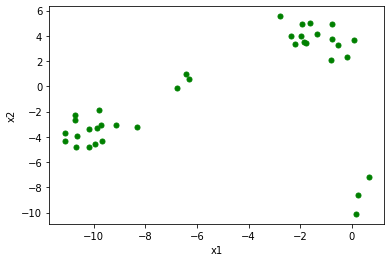

In [2]:
# sklearnのデータセットを用いる
from sklearn.datasets import make_blobs

X, _ = make_blobs(random_state=1,
                 n_samples=30,
                 n_features=2,
                 cluster_std=1.,
                 centers=2)

X_out, _ = make_blobs(random_state=16,
                      n_samples=6,
                      n_features=2,
                      cluster_std=1.,
                      centers=2)


X = np.vstack((X, X_out))

plt.figure()

plt.scatter(X[:, 0], X[:, 1], marker='o', c='green', s=25)
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()

In [3]:
# 入力データは2次元の座標データ
print("X =\n", X[:10])

X =
 [[ -0.19745197   2.34634916]
 [ -1.34052081   4.15711949]
 [-10.66895863  -3.96601315]
 [ -1.92744799   4.93684534]
 [ -9.94690475  -4.59034419]
 [ -1.98197711   4.02243551]
 [ -2.35122066   4.00973634]
 [ -1.61734616   4.98930508]
 [ -9.87755355  -3.33614544]
 [ -9.80679702  -1.85309341]]


### サポートベクターマシンによる分類

カーネル関数にはrbf(ガウシアン)カーネルを使用。  
ハイパラの調整にはこちら↓のサイトの高速化理論を参考にしています。  
https://datachemeng.com/fastoptsvrhyperparams/

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import OneClassSVM as OCSVM
import time

In [5]:
#　学習データを標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#　スケーラを保存する場合
# joblib.dump(scaler, "path_of_scaler.pkl")

In [6]:
## ハイパーパラメータ最適化
t1 = time.time()
print("OCSVM")

'''
・νの設定
学習データが正規分布に従うとき
「平均値±3×標準偏差」内にサンプルがある確率は99.7%
それ以上外れているデータを外れ値として判断する場合には下記のように設定
結果が不適切であれば，値を変えて再度学習
'''
nu = 1 - 99.7/100

# グリッドの設定
gammas = 2**np.arange( -20, 11, dtype=float)     # γ
cv = 5 # 交差検証の分割数

# ガンマをグラム行列の分散が最大になるよう選択
npX = np.array(X_scaled)
var_gram = []
for gamma in gammas:
    gram_matrix = np.exp(-gamma*((npX[:, np.newaxis] - npX)**2).sum(axis=2))
    var_gram.append(gram_matrix.var(ddof=1))
opt_gamma = gammas[np.where(var_gram == np.max(var_gram))[0][0]]

t2 = time.time()
elapsed_time = t2-t1
print("Elapsed time: {} sec".format(elapsed_time))

# 最適なγで学習
ocsvm = OCSVM(kernel="rbf", gamma=opt_gamma, nu=nu).fit(X_scaled)
# joblib.dump(ocsvm, "path_of_model.pkl")

OCSVM
Elapsed time: 0.003988742828369141 sec


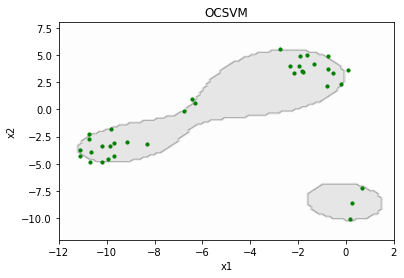

In [7]:
# 学習結果を可視化
x1 = np.linspace(-12., 2., 100)
x2 = np.linspace(-12., 8., 100)
x1_mesh, x2_mesh = np.meshgrid(x1, x2)    

X_mesh = scaler.transform( np.array([x1_mesh.ravel(), x2_mesh.ravel()]).T )

z = ocsvm.predict(X_mesh)
z = z.reshape(x1_mesh.shape)

plt.contourf(x1_mesh, x2_mesh, z, cmap='gray_r', alpha=0.1, linestyles=None)
plt.scatter(X[:, 0], X[:, 1], marker='o', c='green', s=10)

plt.xlabel("x1")
plt.ylabel("x2")

plt.title('OCSVM')

plt.show()

OCSVM
Elapsed time: 0.002958059310913086 sec


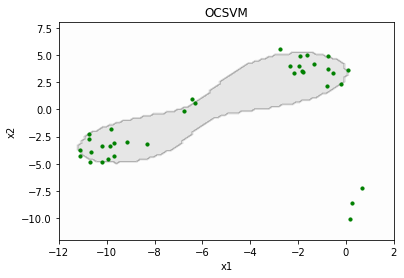

In [8]:
## νが大きい場合
t1 = time.time()
print("OCSVM")

# 「平均値±標準偏差」内にサンプルがある確率は68.3%
nu = 1-0.683

# グリッドの設定
gammas = 2**np.arange( -20, 11, dtype=float)     # γ
cv = 5 # 交差検証の分割数

# ガンマをグラム行列の分散が最大になるよう選択
npX = np.array(X_scaled)
var_gram = []
for gamma in gammas:
    gram_matrix = np.exp(-gamma*((npX[:, np.newaxis] - npX)**2).sum(axis=2))
    var_gram.append(gram_matrix.var(ddof=1))
opt_gamma = gammas[np.where(var_gram == np.max(var_gram))[0][0]]

t2 = time.time()
elapsed_time = t2-t1
print("Elapsed time: {} sec".format(elapsed_time))

# 最適なγで学習
ocsvm = OCSVM(kernel="rbf", gamma=opt_gamma, nu=nu).fit(X_scaled)
# joblib.dump(ocsvm, "path_of_model.pkl")

# 学習結果を可視化
x1 = np.linspace(-12., 2., 100)
x2 = np.linspace(-12., 8., 100)
x1_mesh, x2_mesh = np.meshgrid(x1, x2)    

X_mesh = scaler.transform( np.array([x1_mesh.ravel(), x2_mesh.ravel()]).T )

z = ocsvm.predict(X_mesh)
z = z.reshape(x1_mesh.shape)

plt.contourf(x1_mesh, x2_mesh, z, cmap='gray_r', alpha=0.1, linestyles=None)
plt.scatter(X[:, 0], X[:, 1], marker='o', c='green', s=10)

plt.xlabel("x1")
plt.ylabel("x2")

plt.title('OCSVM')

plt.show()